In [7]:
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#load dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\aparn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


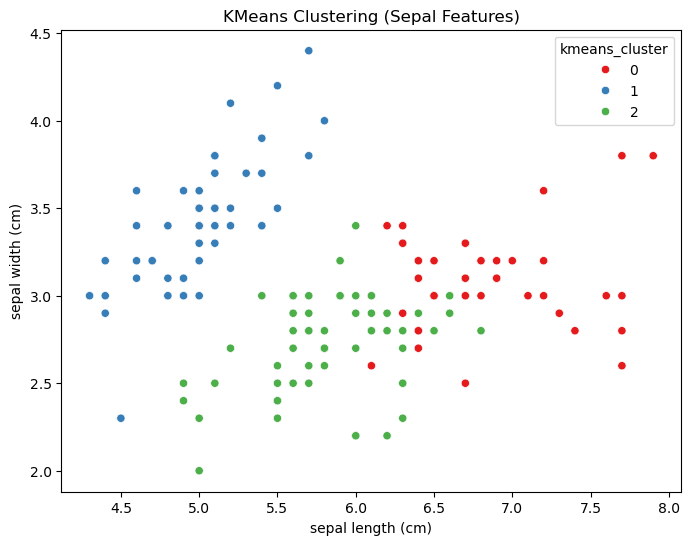

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
kmeans=KMeans(n_clusters=3,random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)

# Plotting clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='kmeans_cluster', palette='Set1')
plt.title("KMeans Clustering (Sepal Features)")
plt.show()
df

How KMeans Clustering Works?
KMeans clustering partitions the dataset into K distinct clusters. It works by:
Choosing K initial cluster centroids randomly.
Assigning each data point to the nearest centroid (based on Euclidean distance).
Updating centroids as the mean of points assigned to each cluster.
Repeating steps 2–3 until convergence.
Why is KMeans suitable for Iris dataset?
Iris dataset has clearly separable clusters based on its features.
KMeans works well when the clusters are spherical and well-separated, which fits this dataset.

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


In [23]:
# Standardize the data for better performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('kmeans_cluster', axis=1))


In [27]:
# Linkage matrix using Ward's method
linkage_matrix = linkage(scaled_data, method='ward')


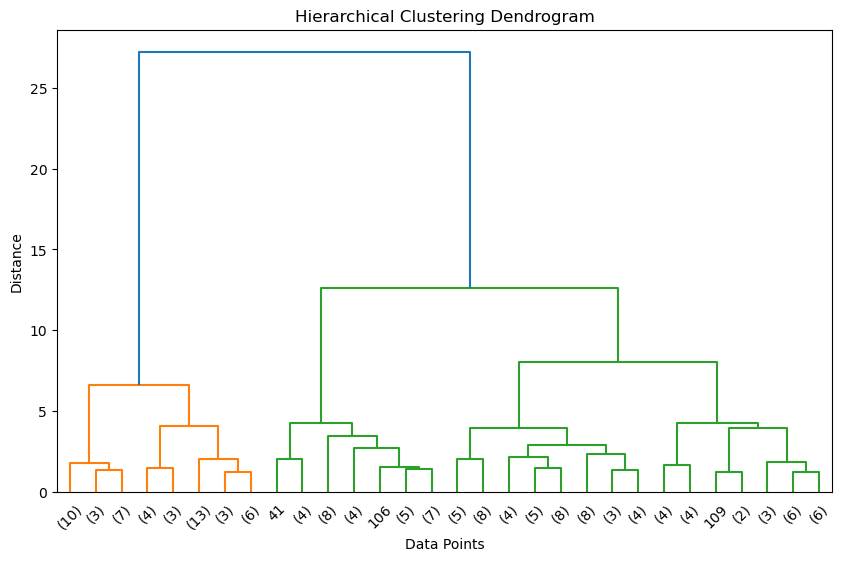

In [25]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

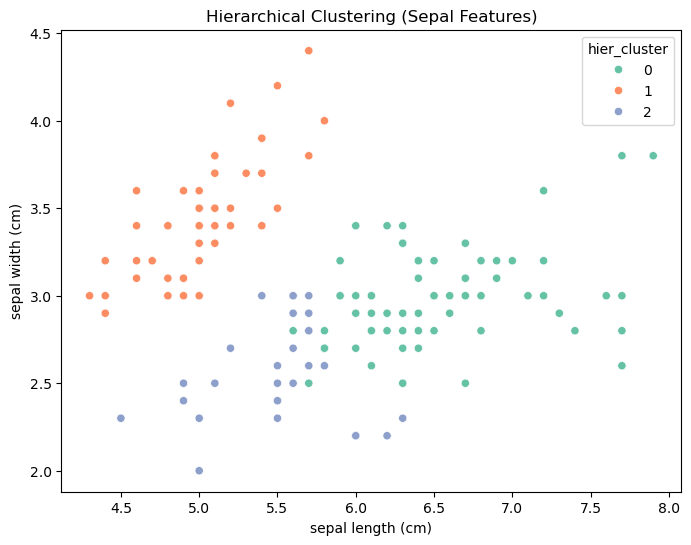

In [29]:
# Apply Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

hier_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['hier_cluster'] = hier_cluster.fit_predict(scaled_data)

# Visualizing the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='hier_cluster', palette='Set2')
plt.title("Hierarchical Clustering (Sepal Features)")
plt.show()

In [ ]:
Hierarchical Clustering 
🔍How Hierarchical Clustering Works
Agglomerative (bottom-up) approach starts by treating each point as its own cluster.

Iteratively merges the closest pairs of clusters based on a linkage metric (e.g., Ward's).

This results in a tree-like structure called a dendrogram.

✅ Why Hierarchical is suitable for Iris?
Useful when the number of clusters is not known a priori.

It provides a visual (dendrogram) to understand cluster relationships.

Good for small datasets like Iris.